# 기상 상황 주행 분류 프로젝트 (개인)

### Tensorflow cnn 구현 이미지 분류

##### 1.데이터 로드

In [27]:
from glob import glob

path = 'D://기상 상황 주행 분류 데이터'

train_data = glob(path+'//Train')


In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [29]:
train_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(320,320),
    seed=100,
    validation_split=0.2,
    subset='training'
)
val_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(320,320),
    seed=100,
    validation_split=0.2,
    subset='validation'
)

Found 45903 files belonging to 4 classes.
Using 36723 files for training.
Found 45903 files belonging to 4 classes.
Using 9180 files for validation.


In [30]:
train_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

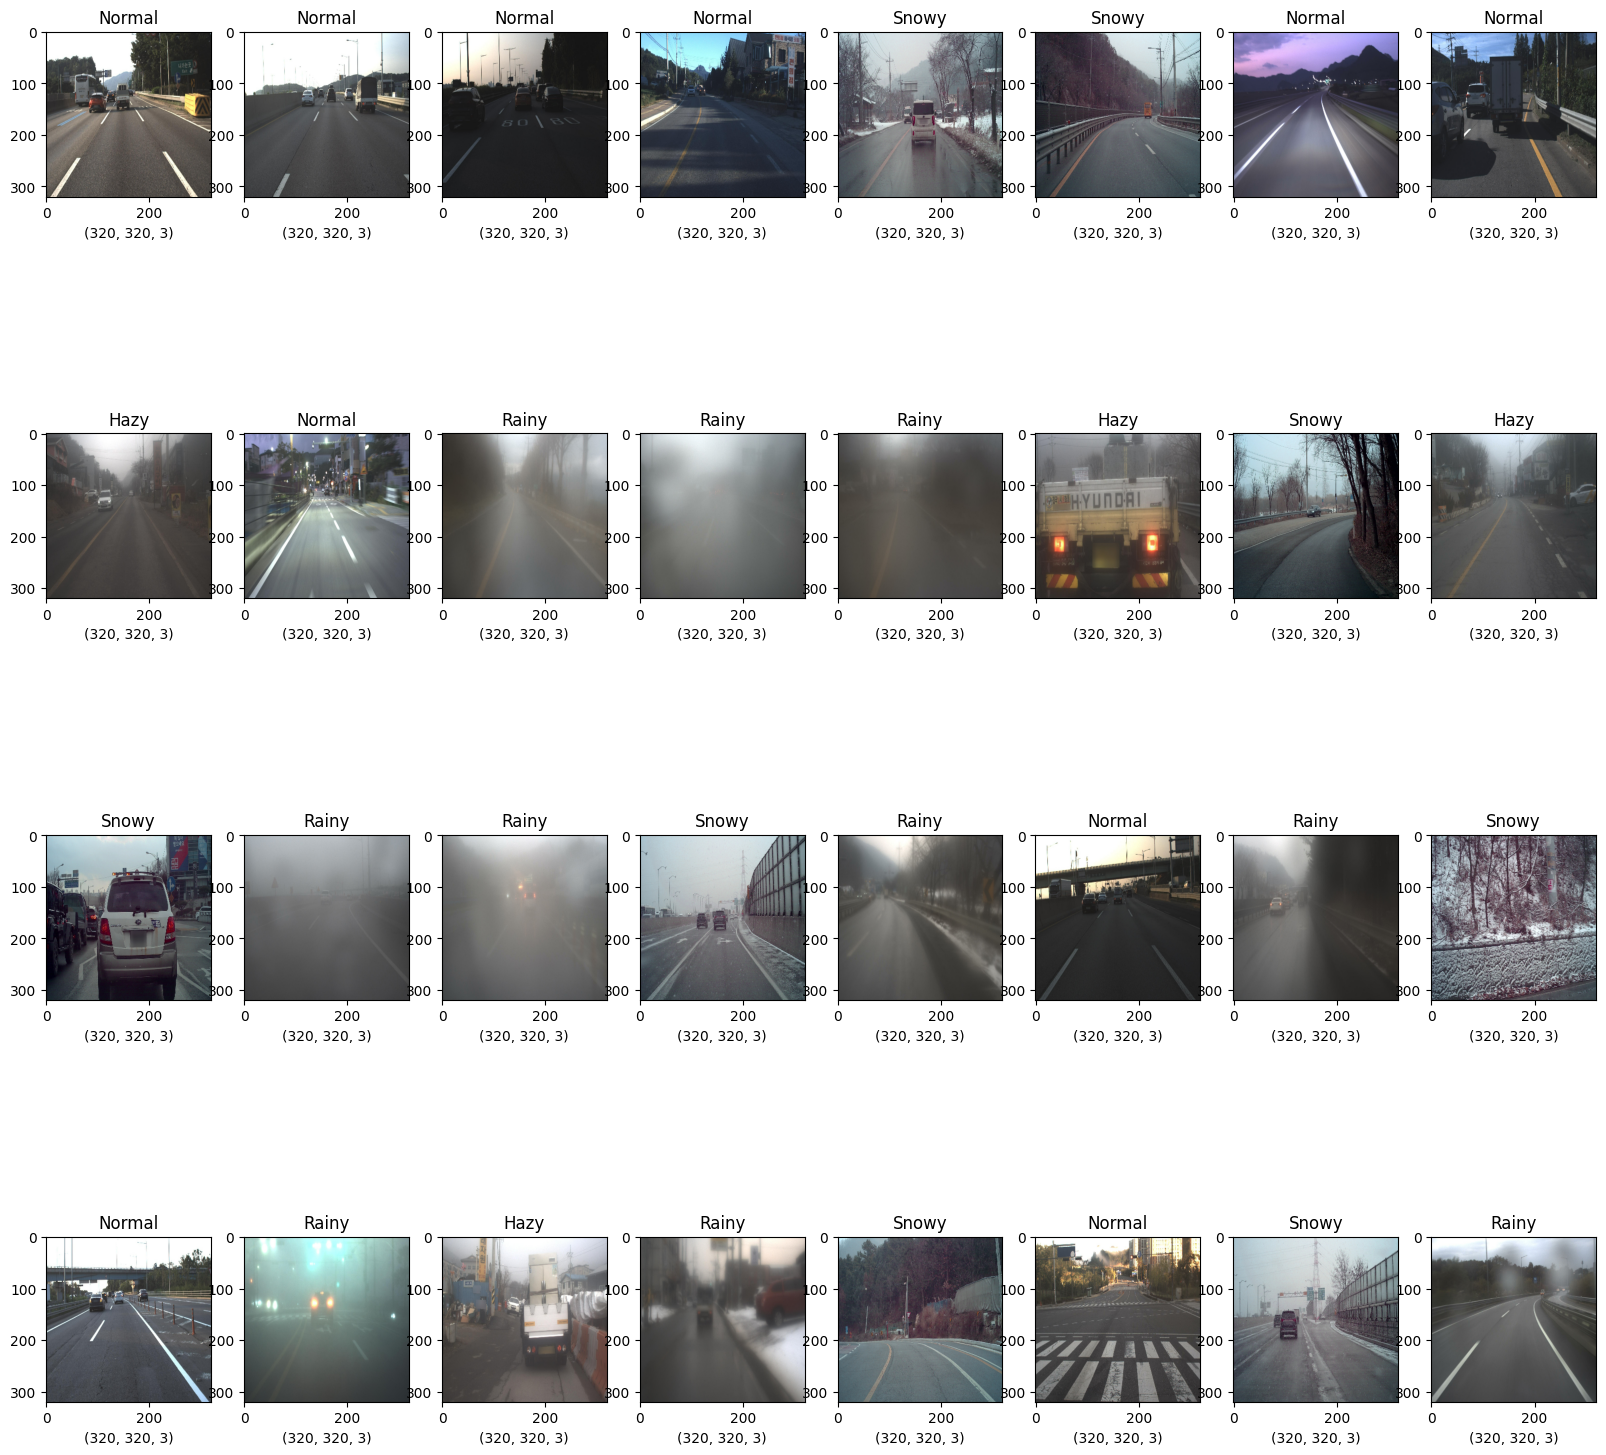

In [31]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in train_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 2. 데이터 split

In [32]:
test_ds = image_dataset_from_directory(
    directory=path+'//Validation',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(320,320),
    seed=100
)

Found 5738 files belonging to 4 classes.


In [33]:
test_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

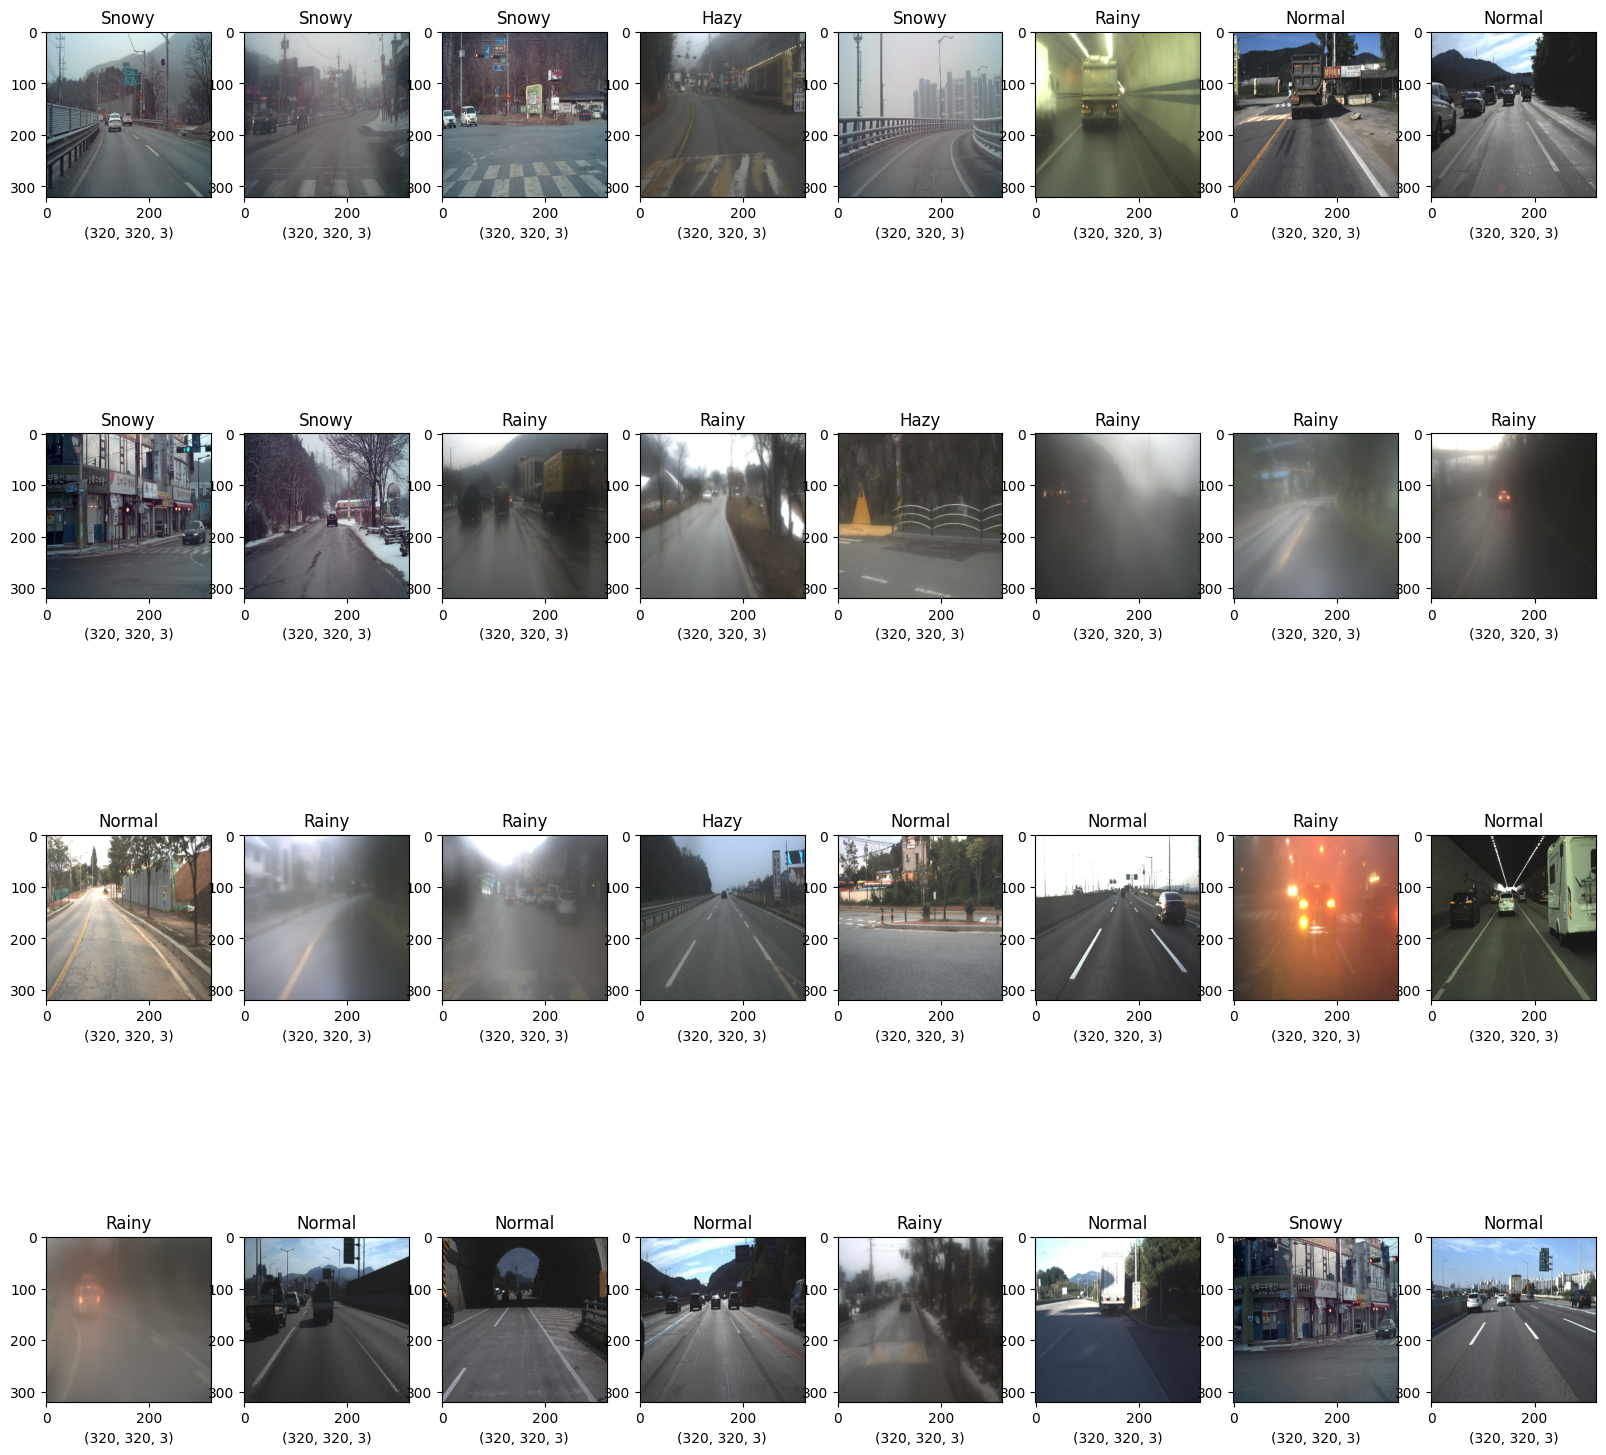

In [34]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in test_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 3. 모델 구성

In [35]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import experimental,Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential(

    [
    experimental.preprocessing.Rescaling(1./255,input_shape=(320,320,3)),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
    ]
)

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 320, 320, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 320, 320, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 160, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 160, 160, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 80, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 80, 80, 64)       

In [38]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

##### 4. 학습

In [39]:
history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


574/574 [==============================] - 100s 173ms/step - loss: 0.2662 - acc: 0.9142 - val_loss: 0.0885 - val_acc: 0.9748
Epoch 2/10
574/574 [==============================] - 106s 182ms/step - loss: 0.0937 - acc: 0.9696 - val_loss: 0.1019 - val_acc: 0.9664
Epoch 3/10
574/574 [==============================] - 101s 175ms/step - loss: 0.0579 - acc: 0.9802 - val_loss: 0.0902 - val_acc: 0.9756
Epoch 4/10
574/574 [==============================] - 101s 174ms/step - loss: 0.0367 - acc: 0.9878 - val_loss: 0.0799 - val_acc: 0.9815
Epoch 5/10
574/574 [==============================] - 100s 173ms/step - loss: 0.0282 - acc: 0.9910 - val_loss: 0.0792 - val_acc: 0.9804
Epoch 6/10
574/574 [==============================] - 101s 174ms/step - loss: 0.0255 - acc: 0.9917 - val_loss: 0.1088 - val_acc: 0.9763
Epoch 7/10
574/574 [==============================] - 100s 173ms/step - loss: 0.0303 - acc: 0.9915 - val_loss: 0.0995 - val_acc: 0.9751
Epoch 8/10
574/574 [==============================] - 100s 

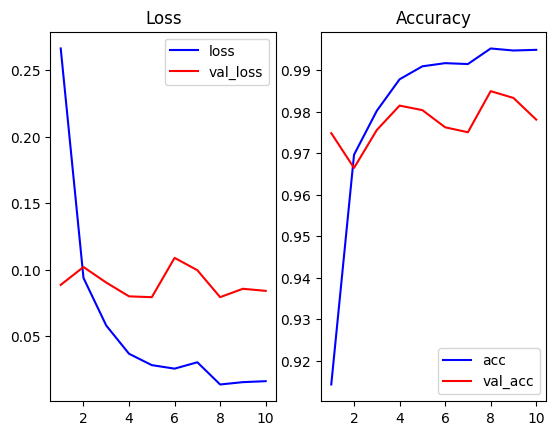

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(range(1,len(loss)+1),loss,color='blue',label='loss')
plt.plot(range(1,len(loss)+1),val_loss,color='red',label='val_loss')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(acc)+1),acc,color='blue',label='acc')
plt.plot(range(1,len(acc)+1),val_acc,color='red',label='val_acc')
plt.title("Accuracy")
plt.legend()
plt.show()

##### 5.검증

In [41]:
model.evaluate(test_ds)

90/90 [==============================] - 11s 111ms/step - loss: 0.0913 - acc: 0.9782


[0.09132113307714462, 0.9782153964042664]